## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9805710	total: 58.1ms	remaining: 58s
1:	learn: 0.9611463	total: 59ms	remaining: 29.5s
2:	learn: 0.9409695	total: 60.1ms	remaining: 20s
3:	learn: 0.9232241	total: 61ms	remaining: 15.2s
4:	learn: 0.9062065	total: 61.9ms	remaining: 12.3s
5:	learn: 0.8888946	total: 63.1ms	remaining: 10.5s
6:	learn: 0.8709730	total: 63.9ms	remaining: 9.07s
7:	learn: 0.8548279	total: 64.8ms	remaining: 8.03s
8:	learn: 0.8398658	total: 65.6ms	remaining: 7.23s
9:	learn: 0.8225429	total: 66.5ms	remaining: 6.59s
10:	learn: 0.8057189	total: 67.3ms	remaining: 6.05s
11:	learn: 0.7893815	total: 68.2ms	remaining: 5.61s
12:	learn: 0.7743709	total: 69ms	remaining: 5.24s
13:	learn: 0.7588383	total: 69.9ms	remaining: 4.92s
14:	learn: 0.7471584	total: 70.9ms	remaining: 4.65s
15:	learn: 0.7322114	total: 71.7ms	remaining: 4.41s
16:	learn: 0.7183822	total: 72.5ms	remaining: 4.19s
17:	learn: 0.7054339	total: 73.2ms	remaining: 4s
18:	learn: 0.6928385	total: 74.1ms	remaining: 3.82s
19:	l

60:	learn: 0.3896867	total: 109ms	remaining: 1.67s
61:	learn: 0.3859182	total: 110ms	remaining: 1.66s
62:	learn: 0.3824398	total: 110ms	remaining: 1.64s
63:	learn: 0.3788176	total: 111ms	remaining: 1.63s
64:	learn: 0.3752801	total: 112ms	remaining: 1.61s
65:	learn: 0.3717107	total: 113ms	remaining: 1.6s
66:	learn: 0.3681468	total: 114ms	remaining: 1.58s
67:	learn: 0.3652185	total: 115ms	remaining: 1.57s
68:	learn: 0.3626862	total: 116ms	remaining: 1.56s
69:	learn: 0.3592354	total: 116ms	remaining: 1.54s
70:	learn: 0.3564405	total: 117ms	remaining: 1.53s
71:	learn: 0.3536761	total: 118ms	remaining: 1.52s
72:	learn: 0.3505777	total: 119ms	remaining: 1.51s
73:	learn: 0.3479506	total: 120ms	remaining: 1.5s
74:	learn: 0.3450702	total: 120ms	remaining: 1.48s
75:	learn: 0.3426658	total: 121ms	remaining: 1.47s
76:	learn: 0.3392191	total: 122ms	remaining: 1.46s
77:	learn: 0.3366738	total: 123ms	remaining: 1.45s
78:	learn: 0.3341987	total: 123ms	remaining: 1.44s
79:	learn: 0.3316815	total: 124ms

159:	learn: 0.2289943	total: 191ms	remaining: 1s
160:	learn: 0.2283079	total: 192ms	remaining: 1s
161:	learn: 0.2274379	total: 193ms	remaining: 999ms
162:	learn: 0.2268321	total: 194ms	remaining: 996ms
163:	learn: 0.2263761	total: 195ms	remaining: 992ms
164:	learn: 0.2257656	total: 195ms	remaining: 989ms
165:	learn: 0.2249420	total: 196ms	remaining: 986ms
166:	learn: 0.2244157	total: 197ms	remaining: 983ms
167:	learn: 0.2237273	total: 198ms	remaining: 981ms
168:	learn: 0.2232138	total: 199ms	remaining: 977ms
169:	learn: 0.2226052	total: 200ms	remaining: 974ms
170:	learn: 0.2220479	total: 200ms	remaining: 971ms
171:	learn: 0.2212604	total: 201ms	remaining: 969ms
172:	learn: 0.2206201	total: 202ms	remaining: 965ms
173:	learn: 0.2199820	total: 203ms	remaining: 962ms
174:	learn: 0.2194474	total: 203ms	remaining: 958ms
175:	learn: 0.2187028	total: 204ms	remaining: 955ms
176:	learn: 0.2180162	total: 205ms	remaining: 952ms
177:	learn: 0.2172298	total: 205ms	remaining: 948ms
178:	learn: 0.2166

289:	learn: 0.1628988	total: 299ms	remaining: 732ms
290:	learn: 0.1624098	total: 300ms	remaining: 731ms
291:	learn: 0.1620231	total: 301ms	remaining: 730ms
292:	learn: 0.1615211	total: 302ms	remaining: 728ms
293:	learn: 0.1612037	total: 303ms	remaining: 727ms
294:	learn: 0.1608418	total: 303ms	remaining: 725ms
295:	learn: 0.1604505	total: 304ms	remaining: 724ms
296:	learn: 0.1599938	total: 305ms	remaining: 722ms
297:	learn: 0.1598104	total: 306ms	remaining: 721ms
298:	learn: 0.1593951	total: 307ms	remaining: 719ms
299:	learn: 0.1589888	total: 308ms	remaining: 718ms
300:	learn: 0.1585544	total: 309ms	remaining: 716ms
301:	learn: 0.1579966	total: 309ms	remaining: 715ms
302:	learn: 0.1576596	total: 310ms	remaining: 714ms
303:	learn: 0.1574074	total: 311ms	remaining: 713ms
304:	learn: 0.1571307	total: 312ms	remaining: 711ms
305:	learn: 0.1566667	total: 313ms	remaining: 710ms
306:	learn: 0.1563949	total: 314ms	remaining: 708ms
307:	learn: 0.1559313	total: 314ms	remaining: 707ms
308:	learn: 

388:	learn: 0.1310516	total: 381ms	remaining: 599ms
389:	learn: 0.1309245	total: 382ms	remaining: 598ms
390:	learn: 0.1305653	total: 383ms	remaining: 596ms
391:	learn: 0.1304110	total: 384ms	remaining: 595ms
392:	learn: 0.1302811	total: 385ms	remaining: 594ms
393:	learn: 0.1300958	total: 385ms	remaining: 593ms
394:	learn: 0.1299173	total: 386ms	remaining: 591ms
395:	learn: 0.1295380	total: 387ms	remaining: 590ms
396:	learn: 0.1293290	total: 388ms	remaining: 590ms
397:	learn: 0.1289639	total: 389ms	remaining: 589ms
398:	learn: 0.1287630	total: 390ms	remaining: 587ms
399:	learn: 0.1286983	total: 391ms	remaining: 586ms
400:	learn: 0.1284658	total: 391ms	remaining: 585ms
401:	learn: 0.1283126	total: 392ms	remaining: 583ms
402:	learn: 0.1281165	total: 393ms	remaining: 582ms
403:	learn: 0.1279681	total: 394ms	remaining: 581ms
404:	learn: 0.1278763	total: 395ms	remaining: 580ms
405:	learn: 0.1275547	total: 396ms	remaining: 579ms
406:	learn: 0.1271582	total: 396ms	remaining: 577ms
407:	learn: 

520:	learn: 0.1065230	total: 490ms	remaining: 450ms
521:	learn: 0.1063764	total: 491ms	remaining: 449ms
522:	learn: 0.1061125	total: 492ms	remaining: 448ms
523:	learn: 0.1057280	total: 492ms	remaining: 447ms
524:	learn: 0.1056673	total: 493ms	remaining: 446ms
525:	learn: 0.1055764	total: 495ms	remaining: 446ms
526:	learn: 0.1053101	total: 496ms	remaining: 445ms
527:	learn: 0.1051023	total: 496ms	remaining: 444ms
528:	learn: 0.1049423	total: 497ms	remaining: 443ms
529:	learn: 0.1047317	total: 498ms	remaining: 442ms
530:	learn: 0.1045201	total: 499ms	remaining: 441ms
531:	learn: 0.1043905	total: 500ms	remaining: 439ms
532:	learn: 0.1042819	total: 500ms	remaining: 438ms
533:	learn: 0.1041250	total: 501ms	remaining: 437ms
534:	learn: 0.1039480	total: 502ms	remaining: 436ms
535:	learn: 0.1039350	total: 503ms	remaining: 435ms
536:	learn: 0.1037787	total: 504ms	remaining: 434ms
537:	learn: 0.1034940	total: 504ms	remaining: 433ms
538:	learn: 0.1033452	total: 505ms	remaining: 432ms
539:	learn: 

618:	learn: 0.0911593	total: 572ms	remaining: 352ms
619:	learn: 0.0909637	total: 573ms	remaining: 351ms
620:	learn: 0.0907659	total: 573ms	remaining: 350ms
621:	learn: 0.0907418	total: 574ms	remaining: 349ms
622:	learn: 0.0905969	total: 575ms	remaining: 348ms
623:	learn: 0.0903766	total: 576ms	remaining: 347ms
624:	learn: 0.0902409	total: 577ms	remaining: 346ms
625:	learn: 0.0901263	total: 577ms	remaining: 345ms
626:	learn: 0.0900031	total: 578ms	remaining: 344ms
627:	learn: 0.0898433	total: 579ms	remaining: 343ms
628:	learn: 0.0897141	total: 580ms	remaining: 342ms
629:	learn: 0.0894886	total: 581ms	remaining: 341ms
630:	learn: 0.0892652	total: 582ms	remaining: 340ms
631:	learn: 0.0892120	total: 583ms	remaining: 339ms
632:	learn: 0.0890699	total: 583ms	remaining: 338ms
633:	learn: 0.0889742	total: 584ms	remaining: 337ms
634:	learn: 0.0887686	total: 585ms	remaining: 336ms
635:	learn: 0.0886483	total: 586ms	remaining: 335ms
636:	learn: 0.0885702	total: 587ms	remaining: 334ms
637:	learn: 

746:	learn: 0.0744764	total: 680ms	remaining: 230ms
747:	learn: 0.0743805	total: 681ms	remaining: 229ms
748:	learn: 0.0743691	total: 682ms	remaining: 228ms
749:	learn: 0.0742276	total: 683ms	remaining: 228ms
750:	learn: 0.0740873	total: 684ms	remaining: 227ms
751:	learn: 0.0740036	total: 684ms	remaining: 226ms
752:	learn: 0.0738147	total: 685ms	remaining: 225ms
753:	learn: 0.0737077	total: 686ms	remaining: 224ms
754:	learn: 0.0736676	total: 687ms	remaining: 223ms
755:	learn: 0.0736455	total: 688ms	remaining: 222ms
756:	learn: 0.0735495	total: 689ms	remaining: 221ms
757:	learn: 0.0733488	total: 689ms	remaining: 220ms
758:	learn: 0.0731973	total: 690ms	remaining: 219ms
759:	learn: 0.0730806	total: 691ms	remaining: 218ms
760:	learn: 0.0729476	total: 692ms	remaining: 217ms
761:	learn: 0.0728514	total: 693ms	remaining: 216ms
762:	learn: 0.0728281	total: 694ms	remaining: 215ms
763:	learn: 0.0727417	total: 695ms	remaining: 215ms
764:	learn: 0.0726009	total: 696ms	remaining: 214ms
765:	learn: 

844:	learn: 0.0644744	total: 763ms	remaining: 140ms
845:	learn: 0.0643892	total: 764ms	remaining: 139ms
846:	learn: 0.0643214	total: 764ms	remaining: 138ms
847:	learn: 0.0642126	total: 765ms	remaining: 137ms
848:	learn: 0.0640992	total: 766ms	remaining: 136ms
849:	learn: 0.0639548	total: 767ms	remaining: 135ms
850:	learn: 0.0638398	total: 768ms	remaining: 134ms
851:	learn: 0.0637734	total: 769ms	remaining: 134ms
852:	learn: 0.0636536	total: 770ms	remaining: 133ms
853:	learn: 0.0635510	total: 770ms	remaining: 132ms
854:	learn: 0.0634812	total: 772ms	remaining: 131ms
855:	learn: 0.0633533	total: 772ms	remaining: 130ms
856:	learn: 0.0632567	total: 773ms	remaining: 129ms
857:	learn: 0.0631365	total: 774ms	remaining: 128ms
858:	learn: 0.0630182	total: 775ms	remaining: 127ms
859:	learn: 0.0628720	total: 776ms	remaining: 126ms
860:	learn: 0.0627098	total: 776ms	remaining: 125ms
861:	learn: 0.0626842	total: 778ms	remaining: 125ms
862:	learn: 0.0625849	total: 779ms	remaining: 124ms
863:	learn: 

967:	learn: 0.0537901	total: 870ms	remaining: 28.8ms
968:	learn: 0.0537328	total: 871ms	remaining: 27.9ms
969:	learn: 0.0537020	total: 872ms	remaining: 27ms
970:	learn: 0.0536080	total: 873ms	remaining: 26.1ms
971:	learn: 0.0535551	total: 874ms	remaining: 25.2ms
972:	learn: 0.0535068	total: 874ms	remaining: 24.3ms
973:	learn: 0.0534914	total: 875ms	remaining: 23.4ms
974:	learn: 0.0534184	total: 876ms	remaining: 22.5ms
975:	learn: 0.0533360	total: 877ms	remaining: 21.6ms
976:	learn: 0.0532948	total: 878ms	remaining: 20.7ms
977:	learn: 0.0531920	total: 879ms	remaining: 19.8ms
978:	learn: 0.0530988	total: 879ms	remaining: 18.9ms
979:	learn: 0.0530551	total: 880ms	remaining: 18ms
980:	learn: 0.0529897	total: 881ms	remaining: 17.1ms
981:	learn: 0.0528844	total: 882ms	remaining: 16.2ms
982:	learn: 0.0528230	total: 883ms	remaining: 15.3ms
983:	learn: 0.0527526	total: 884ms	remaining: 14.4ms
984:	learn: 0.0527199	total: 885ms	remaining: 13.5ms
985:	learn: 0.0526362	total: 885ms	remaining: 12.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

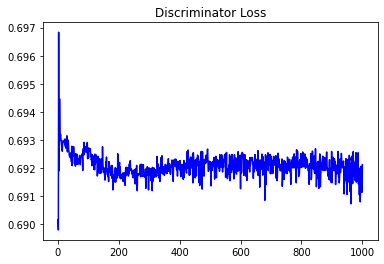

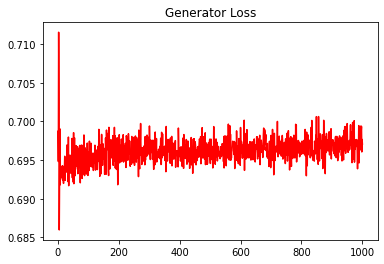

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1870999660325249


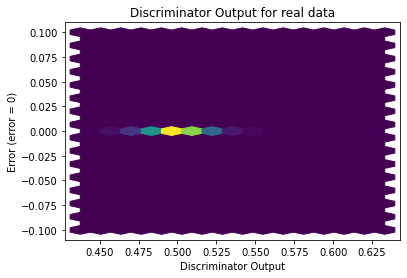

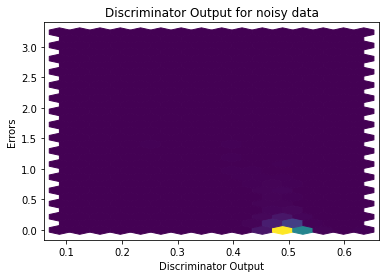

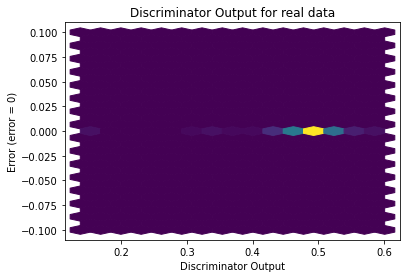

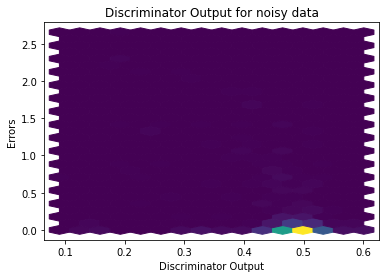

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


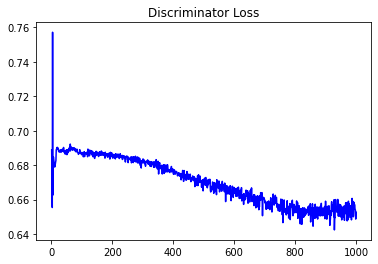

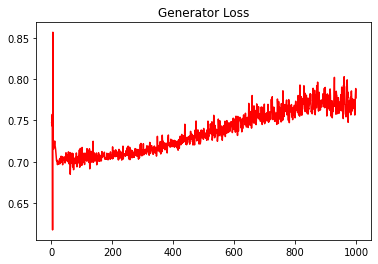

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.24550188504771278


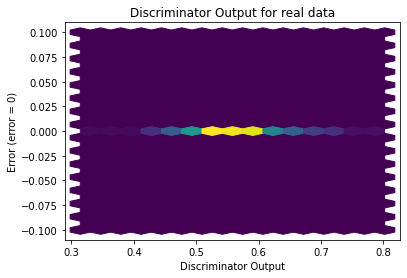

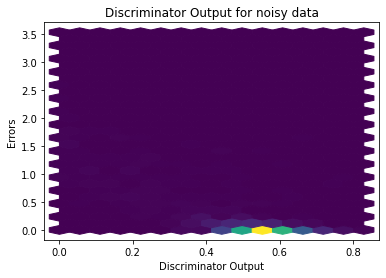

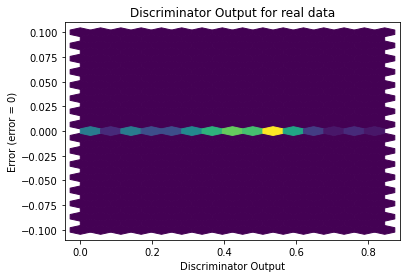

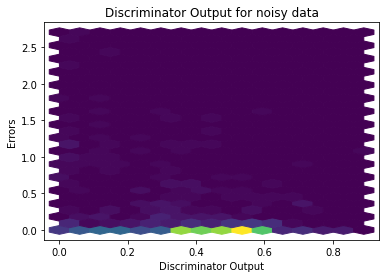

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2179]], requires_grad=True)
